# Cryptocurrency Clusters

## Background:
    
####    You are on the Advisory Services Team of a financial consultancy. One of your clients, a prominent investment bank, is interested in offering a new cryptocurrency investment portfolio for its customers. The company, however, is lost in the vast universe of cryptocurrencies. They’ve asked you to create a report that includes what cryptocurrencies are on the trading market and determine whether they can be grouped to create a classification system for this new investment.
####    You have been handed raw data, so you will first need to process it to fit the machine learning models. Since there is no known classification system, you will need to use unsupervised learning. You will use several clustering algorithms to explore whether the cryptocurrencies can be grouped together with other similar cryptocurrencies. You will use data visualization to share your findings with the investment bank.

In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Read `crypto_data.csv` into Pandas. The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).
file_path = "C://Users/abrow/Desktop/EMERSON_BOOTCAMP/BOOTCAMP_AMB/Homeworks/hw15_02-12-2022_Unsupervised_Machine_Learning/Cryptocurrency-ChallengeUML/Instructions/crypto_data.csv"

crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Getting info on the original dataframe traits for later comparison
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


### Data Preparation:

In [4]:
# Discarding all cryptocurrencies that are not being traded. 
crypto_df.drop(crypto_df.loc[crypto_df['IsTrading']==False].index,inplace=True)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# Dropping the `IsTrading` column from the dataframe.
isTrading_dropped = crypto_df .drop(['IsTrading'], axis=1)
isTrading_dropped

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Finding the rows that have null values
for column in isTrading_dropped.columns:
    print(f"{column} has {isTrading_dropped[column].isnull().sum()} null values.")

CoinName has 0 null values.
Algorithm has 0 null values.
ProofType has 0 null values.
TotalCoinsMined has 459 null values.
TotalCoinSupply has 0 null values.


In [7]:
# Removing all rows that have at least one null value.
null_dropped = isTrading_dropped.dropna()
null_dropped

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
unMined_dropped = null_dropped[null_dropped['TotalCoinsMined']>0]
unMined_dropped

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Deleting the `CoinName` from the original dataframe.
coin_dropped=unMined_dropped.drop(["CoinName"],axis='columns')
coin_dropped

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. 
# Use Pandas to create dummy variables. 
dummied_crypto=pd.get_dummies(data=coin_dropped, columns=['Algorithm', 'ProofType'])
dummied_crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Getting info on the dummied_crypto dataframe
dummied_crypto.info()

# <class 'pandas.core.frame.DataFrame'>
# Index: 1144 entries, 42 to XBC
# Data columns (total 6 columns):
#  #   Column           Non-Null Count  Dtype  
# ---  ------           --------------  -----  
#  0   CoinName         1144 non-null   object 
#  1   Algorithm        1144 non-null   object 
#  2   IsTrading        1144 non-null   bool   
#  3   ProofType        1144 non-null   object 
#  4   TotalCoinsMined  685 non-null    float64
#  5   TotalCoinSupply  1144 non-null   object 
# dtypes: bool(1), float64(1), object(4)
# memory usage: 54.7+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    object 
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorithm_Cr

# Examine the number of rows and columns of your dataset now. How did they change?

#### The original dataframe had over 1000 rows of data and only 6 columns with 1 boolean data type column, 1 float column, and 4 object columns. The dataframe above with the transformation of the categorical data  into numeric dummy values, increase the column count to 98 columns; one of which had a float data type, 1 object, and 96 uinteger columns. 

In [12]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
X = dummied_crypto
X_scaled = StandardScaler().fit_transform(X)

### Dimensionality Reduction

#### Perform dimensionality reduction with PCA. 

In [13]:
# Initializing the PCA model
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(X_scaled)

### Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired ##explained variance##. 
### For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

#### I searched and searched for how to do this and couldn't figure out how to, and I'm not sure I even understand what it's asking, so I'm just going to proceed with specifiying the number of components

In [14]:
# Transferring the data to a dataframe
cryptoPCA_df = pd.DataFrame(data=crypto_pca)
cryptoPCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,4.324640e-15,9.752016e-12,-6.226071e-14,-0.007129,-1.319756,-0.051813,...,8.336402e-16,-7.937942e-15,7.870363e-15,2.745853e-15,-3.848639e-16,8.608892e-16,3.041883e-15,4.896403e-15,-4.882430e-15,7.262069e-17
1,-0.318434,1.032331,-0.591126,0.001386,4.295822e-15,9.672416e-12,-6.259683e-14,-0.007739,-1.322514,-0.056674,...,7.405942e-16,-7.733206e-15,7.729563e-15,2.987012e-15,-2.805047e-16,7.514783e-16,3.019553e-15,5.034150e-15,-4.693110e-15,1.065456e-15
2,2.305468,1.656383,-0.683617,0.004731,8.811888e-15,3.304775e-11,-9.075653e-14,-0.054781,-1.542879,-0.943951,...,1.579313e-13,7.656166e-14,-2.598442e-13,2.348443e-14,-6.134063e-14,5.688523e-15,-6.166293e-14,7.925112e-14,1.796982e-14,-2.820529e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.835182e-15,-8.578805e-12,2.236025e-14,-0.002071,0.281463,0.251862,...,1.883129e-14,5.206451e-15,-4.109907e-14,3.400920e-15,9.182469e-15,3.086738e-15,-7.760970e-15,1.574545e-14,1.363806e-14,-1.999674e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-7.138126e-15,-1.191114e-11,4.761144e-14,0.027735,0.519099,0.188820,...,-1.695646e-14,-3.089158e-15,1.896659e-13,-8.831415e-14,2.102708e-13,1.220167e-13,-1.844971e-14,7.231202e-14,1.693269e-13,-2.162087e-13


In [15]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results. 
tsne = TSNE()
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape
# Run t-SNE on the principal components: the output of the PCA transformation. 
#tsne_features = scaler.fit_transform(crypto_pca)


(532, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

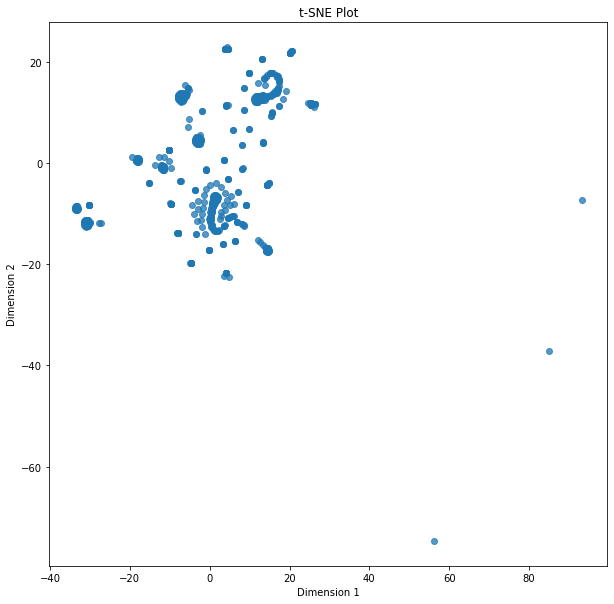

In [16]:
# Create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
plt.figure(figsize=(10,10))
plt.scatter(
    x=tsne_features[:,0],
    y=tsne_features[:,1],
    alpha = 0.75)

plt.title("t-SNE Plot")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show

In [17]:
### Cluster Analysis with k-Means
# Create an elbow plot to identify the best number of clusters. 
# Use a for-loop to determine the inertia for each `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.



In [18]:
### Recommendation
# Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 

